In [1]:
x = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
y = [-1, -1, -1, -1, -1, -1, -1,  +1, +1, +1, +1, +1, +1, +1, +1]

In [23]:
def predictions(theta, theta_0, data, labels):
    predicted_labels = []
    for i in range(len(data)):
        if theta*data[i]+ theta_0 >= 0:
            predicted_labels.append(1)
        else:
            predicted_labels.append(-1)
    return predicted_labels

def Loss(theta, theta_0, data, labels):
    error = 0
    predicted_labels = predictions(theta, theta_0, data, labels)
    for i in range(len(labels)):
        if predicted_labels[i] == labels[i]:
            error += 0
        else:
            error += 1
    return error

def PERCEPTRON(theta, theta_0, data, labels, epochs):
    for _ in range(epochs):
        for i in range(len(data)):
            error =  Loss(theta, theta_0, data, labels)
            if error == 0:
                break
            elif ((labels[i]*(theta*data[i])+ theta_0)) <= 0:
                theta = theta + labels[i]*data[i]
                theta_0 = theta_0 + labels[i]
    return theta, theta_0


In [24]:
theta = 0
theta_0 = 0

theta, theta_0 = PERCEPTRON(theta, theta_0, x, y, 500)

print(theta, theta_0)
print(Loss(theta, theta_0, x, y))
print(predictions(theta, theta_0, x, y,))

3 -23
0
[-1, -1, -1, -1, -1, -1, -1, 1, 1, 1, 1, 1, 1, 1, 1]


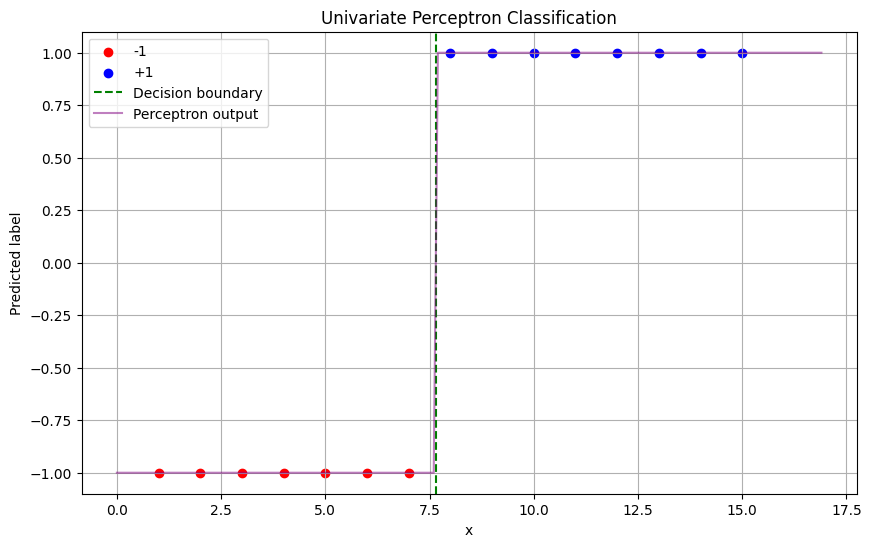

In [25]:
import matplotlib.pyplot as plt
x_pos = [xi for xi, yi in zip(x, y) if yi == 1]
y_pos = [1 for _ in x_pos]
x_neg = [xi for xi, yi in zip(x, y) if yi == -1]
y_neg = [-1 for _ in x_neg]

plt.figure(figsize=(10,6))

# Scatter plot points
plt.scatter(x_neg, y_neg, color='red', label='-1')
plt.scatter(x_pos, y_pos, color='blue', label='+1')

# Decision boundary: theta*x + theta_0 = 0 => x = -theta_0/theta
if theta != 0:
    boundary = -theta_0 / theta
    plt.axvline(x=boundary, color='green', linestyle='--', label='Decision boundary')

# Step function output
x_line = [i*0.1 for i in range(int(min(x)-1)*10, int(max(x)+2)*10)]
y_line = [1 if theta*xi + theta_0 >= 0 else -1 for xi in x_line]
plt.plot(x_line, y_line, color='purple', linestyle='-', alpha=0.5, label='Perceptron output')

plt.xlabel('x')
plt.ylabel('Predicted label')
plt.title('Univariate Perceptron Classification')
plt.legend()
plt.grid(True)
plt.show()